# Project 10 -- Arnav Surve

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [3]:
options(jupyter.rich_display = F)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=200)

In [4]:
library(data.table)

In [7]:
county <- fread("/anvil/projects/tdm/data/zillow/County_time_series.csv")

In [8]:
dim(county)

[1] 518791     82

In [9]:
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [11]:
month(head(county$Date))

[1] 4 4 4 4 4 4

In [12]:
day(head(county$Date))

[1] 30 30 30 30 30 30

In [13]:
year(head(county$Date))

[1] 1996 1996 1996 1996 1996 1996

In [14]:
county$month <- month(county$Date)

In [15]:
county$day <- day(county$Date)

In [16]:
county$year <- year(county$Date)

In [17]:
head(county)

  Date       RegionName DaysOnZillow_AllHomes
1 1996-04-30 10001      NA                   
2 1996-04-30 10003      NA                   
3 1996-04-30  1003      NA                   
4 1996-04-30  1009      NA                   
5 1996-04-30  1017      NA                   
6 1996-04-30  1051      NA                   
  InventorySeasonallyAdjusted_AllHomes InventoryRaw_AllHomes
1 NA                                   NA                   
2 NA                                   NA                   
3 NA                                   NA                   
4 NA                                   NA                   
5 NA                                   NA                   
6 NA                                   NA                   
  MedianListingPricePerSqft_1Bedroom MedianListingPricePerSqft_2Bedroom
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                               

In [18]:
county$mdy <- paste0(county$month, "/", county$day, "/", county$year, "/")

In [20]:
length(table(county$year))

[1] 22

In [24]:
v <- tapply(county$MedianListingPricePerSqft_3Bedroom, county$year, mean, na.rm=TRUE)

In [25]:
w <- tapply(county$MedianListingPricePerSqft_1Bedroom, county$year, mean, na.rm=TRUE)

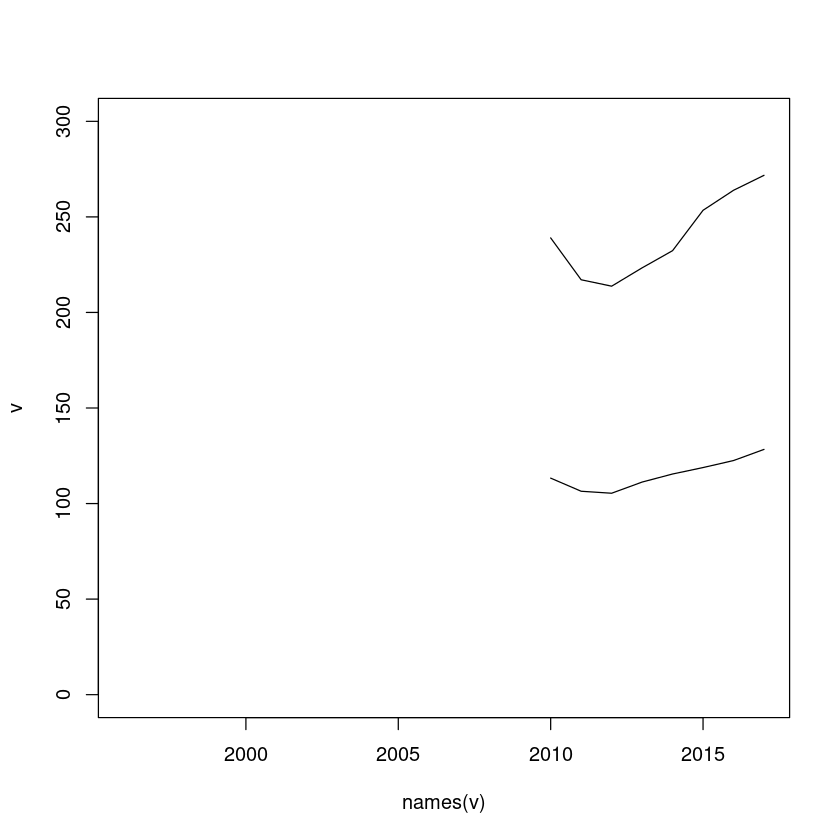

In [28]:
plot(names(v), v, type="l", ylim=c(0,300))
lines(names(w), w, type="l")

a. Cell 18

b. There are a total of 22 years in the dataframe.

c. Cell 28

d. The graph of the median listing price for 3 bedrooms is 200 - 250 dollars more than it is for a 1 bedroom space.

## Question 2

In [30]:
dim(county)

[1] 518791     86

In [31]:
names(county)[grep("ier", names(county))]

[1] "ZHVI_BottomTier" "ZHVI_MiddleTier" "ZHVI_TopTier"   

In [32]:
head(county$ZHVI_BottomTier)

[1] 65600 81900 70600    NA    NA    NA

In [33]:
head(county$ZHVI_MiddleTier)

[1]  85700 116800 110600  70000     NA     NA

In [34]:
head(county$ZHVI_TopTier)

[1] 129700 181400 192300 123500     NA     NA

In [35]:
tapply(county$ZHVI_TopTier, county$year, mean, na.rm=TRUE)

    1996     1997     1998     1999     2000     2001     2002     2003 
149657.1 153220.3 160847.4 170195.2 182168.7 193997.8 204287.7 217986.8 
    2004     2005     2006     2007     2008     2009     2010     2011 
237117.5 262079.6 276630.7 277911.1 268666.4 257466.4 237383.0 228135.3 
    2012     2013     2014     2015     2016     2017 
228593.1 235660.7 245301.8 254253.5 263219.7 275637.1 

In [36]:
v <- tapply(county$ZHVI_TopTier, county$year, mean, na.rm=TRUE)

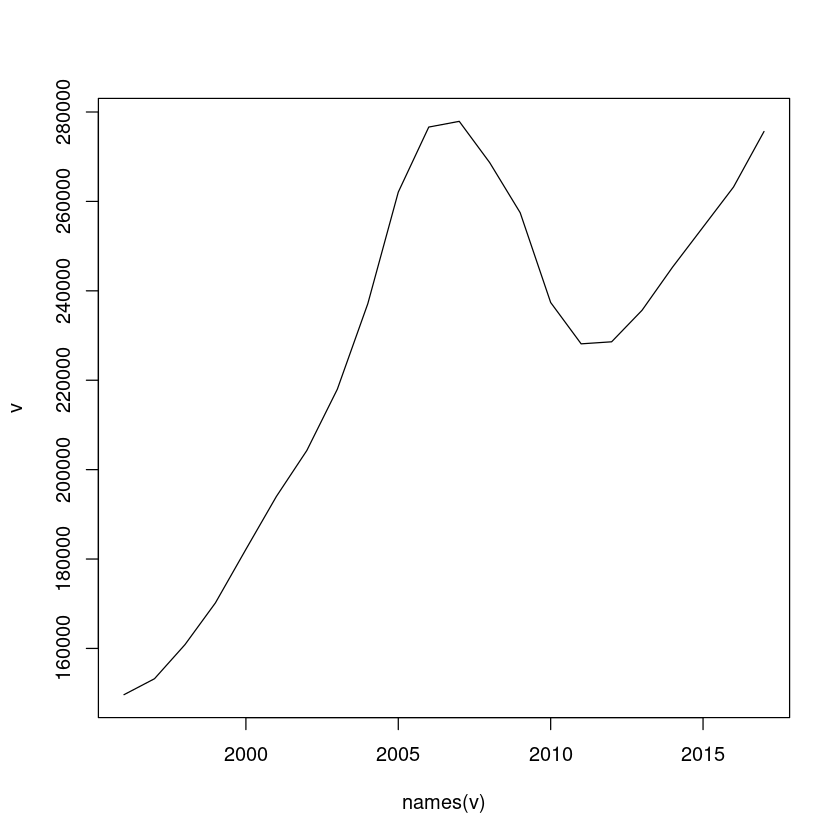

In [37]:
plot(names(v), v, type="l")

In [38]:
tapply(county$ZHVI_BottomTier, county$year, mean, na.rm=TRUE)["2014"]

    2014 
98515.35 

In [40]:
mean(county$ZHVI_BottomTier[county$year == "2014"], na.rm=TRUE)

[1] 98515.35

In [42]:
tapply(county$ZHVI_MiddleTier, county$year, mean, na.rm=TRUE)["2010"]

    2010 
144725.4 

In [43]:
mean(county$ZHVI_MiddleTier[county$year == "2010"], na.rm=TRUE)

[1] 144725.4

a. The average median price for top tier homes is around 150,000 to 275,000 from 1996 to 2017.

b. In 2014, the average value of median bottom tier homes was 98,515.35.

c. In 2010, the average value of median middle tier homes was 144,725.40.

## Question 3

In [47]:
v <- tapply(county$ZHVI_TopTier, county$year, mean, na.rm=TRUE)

In [48]:
v

    1996     1997     1998     1999     2000     2001     2002     2003 
149657.1 153220.3 160847.4 170195.2 182168.7 193997.8 204287.7 217986.8 
    2004     2005     2006     2007     2008     2009     2010     2011 
237117.5 262079.6 276630.7 277911.1 268666.4 257466.4 237383.0 228135.3 
    2012     2013     2014     2015     2016     2017 
228593.1 235660.7 245301.8 254253.5 263219.7 275637.1 

In [50]:
w <- tapply(county$ZHVI_MiddleTier, county$year, mean, na.rm=TRUE)

In [52]:
w

     1996      1997      1998      1999      2000      2001      2002      2003 
 96498.43  98422.62 102068.37 107461.44 114059.06 121324.76 128138.82 136994.10 
     2004      2005      2006      2007      2008      2009      2010      2011 
149029.88 164915.91 173707.55 173018.17 165196.71 156687.23 144725.43 137878.30 
     2012      2013      2014      2015      2016      2017 
136482.30 141333.70 146389.76 152357.83 159839.23 169282.88 

In [51]:
x <- tapply(county$ZHVI_BottomTier, county$year, mean, na.rm=TRUE)

In [53]:
x

     1996      1997      1998      1999      2000      2001      2002      2003 
 70103.58  70972.25  73359.88  76783.98  81212.09  86265.79  91326.15  98142.64 
     2004      2005      2006      2007      2008      2009      2010      2011 
107430.56 119010.28 125644.02 125330.50 118547.15 110504.53 101618.24  95133.68 
     2012      2013      2014      2015      2016      2017 
 92742.05  95140.22  98515.35 102933.27 109040.48 116971.91 

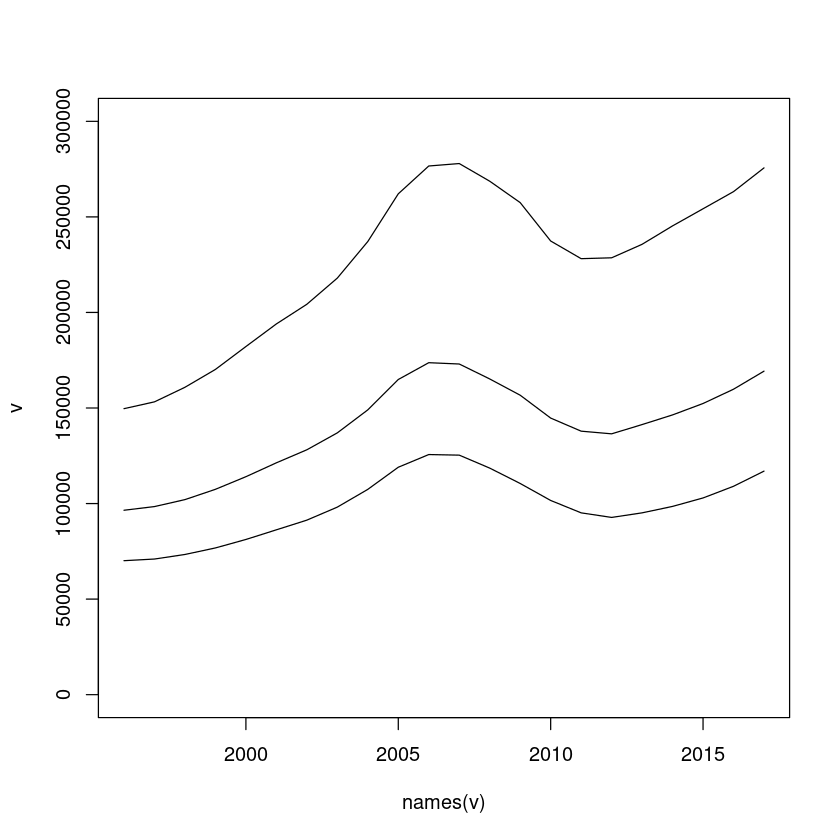

In [55]:
plot(names(v), v, type="l", ylim=c(0,300000))
lines(names(w), w, type="l")
lines(names(x), x, type="l")

## Question 4

In [56]:
v <- tapply(county$ZHVI_TopTier, county$month, mean, na.rm=TRUE)

In [58]:
w <- tapply(county$ZHVI_MiddleTier, county$month, mean, na.rm=TRUE)

In [57]:
x <- tapply(county$ZHVI_BottomTier, county$month, mean, na.rm=TRUE)

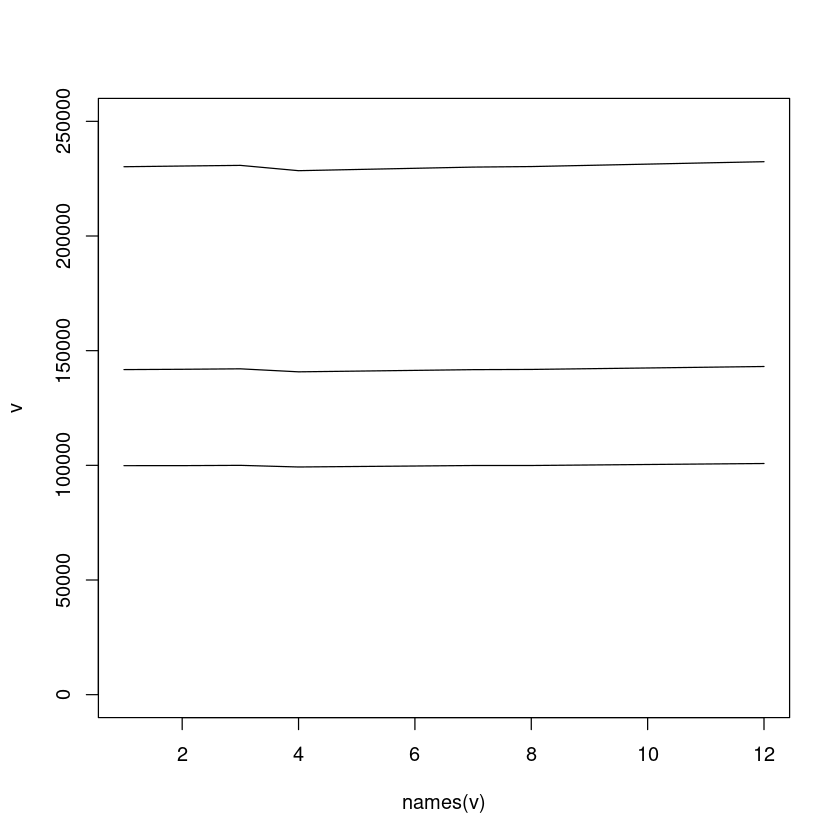

In [60]:
plot(names(v), v, type="l", ylim=c(0,250000))
lines(names(w), w, type="l")
lines(names(x), x, type="l")

I chose to look at the mean price for top, middle, and bottom tier homes on a monthly basis, as I thought it could give some insight into how the price fluctuates from month to month. I found that they did not deviate very significantly in their price between months.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.